# Map violations data

#### Set up environment

In [1]:
# Install paretochart
!pip install --upgrade paretochart

# Import necessary packages 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

Requirement already up-to-date: paretochart in /home/russell/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: matplotlib in /home/russell/anaconda3/lib/python3.6/site-packages (from paretochart)
Requirement already up-to-date: numpy>=1.7.1 in /home/russell/anaconda3/lib/python3.6/site-packages (from matplotlib->paretochart)
Requirement already up-to-date: python-dateutil>=2.1 in /home/russell/anaconda3/lib/python3.6/site-packages (from matplotlib->paretochart)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /home/russell/anaconda3/lib/python3.6/site-packages (from matplotlib->paretochart)
Requirement already up-to-date: cycler>=0.10 in /home/russell/anaconda3/lib/python3.6/site-packages (from matplotlib->paretochart)
Requirement already up-to-date: pytz in /home/russell/anaconda3/lib/python3.6/site-packages (from matplotlib->paretochart)
Requirement already up-to-date: kiwisolver>=1.0.1 in /home/russell/anaconda3/lib/python3.6/site-packa

In [2]:
# Troubleshooting issue with notebook not being able to import pareto module
import sys
# sys.path.append('/Users/davidplewis/anaconda3/lib/python3.6/site-packages/paretochart')
# sys.path.pop(6)
sys.path


['',
 '/home/russell/anaconda3/lib/python36.zip',
 '/home/russell/anaconda3/lib/python3.6',
 '/home/russell/anaconda3/lib/python3.6/lib-dynload',
 '/home/russell/anaconda3/lib/python3.6/site-packages',
 '/home/russell/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/davidplewis/anaconda3/lib/python3.6/site-packages/paretochart']

In [3]:
sys.path

['',
 '/home/russell/anaconda3/lib/python36.zip',
 '/home/russell/anaconda3/lib/python3.6',
 '/home/russell/anaconda3/lib/python3.6/lib-dynload',
 '/home/russell/anaconda3/lib/python3.6/site-packages',
 '/home/russell/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/davidplewis/anaconda3/lib/python3.6/site-packages/paretochart']

In [4]:
from paretochart import paretochart

ImportError: cannot import name 'pareto'

#### Import and clean data

In [7]:
# Import violations data
import os.path
root_path = os.path.dirname(os.getcwd())
violation_values  = pd.read_csv(os.path.join(root_path,"DATA/violation_values.csv"))
violation_counts  = pd.read_csv(os.path.join(root_path,"DATA/violation_counts.csv"))


In [8]:
violation_values.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,...,v_37,v_38,v_39,v_40,v_41,v_42,v_43,v_44,v_70,inspection_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2181627
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2181601
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2181581
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2181524
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2181523


In [9]:
violation_columns = (list(violation_values.columns))
violation_columns.remove("inspection_id")
violation_sums = violation_values[violation_columns].sum()
violation_sums = pd.DataFrame({'violation':violation_sums.index, 'count':violation_sums.values})
violation_sums


,count,violation
0,298.0,v_1
1,2623.0,v_2
2,5220.0,v_3
3,258.0,v_4
4,8.0,v_5
5,959.0,v_6
6,67.0,v_7
7,1350.0,v_8
8,413.0,v_9
9,279.0,v_10


#### Graph Violations

In [10]:
# Make pareto chart from violation sums
data = violation_sums["count"].values.tolist()
labels = violation_sums["violation"].values.tolist()
test_data = [21, 2, 10, 4, 16]

# fig, axes = plt.subplots(2, 2)

chart = paretochart.pareto(data, labels, limit=.8, line_args=('g',))
# plt.title('Basic chart without labels', fontsize=10)
plt.rcParams["figure.figsize"] = (20,3)

NameError: name 'paretochart' is not defined

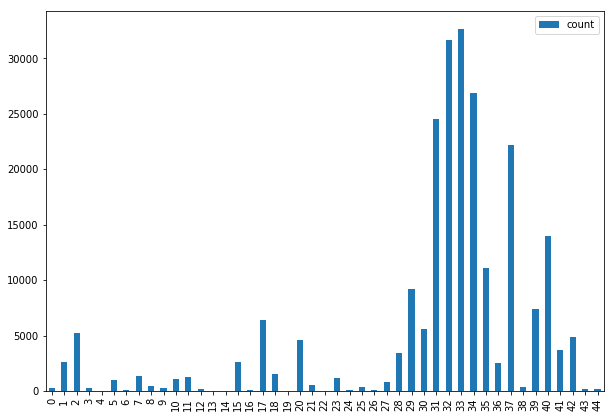

In [11]:
# Make bar graph of violation sums

violation_graph =violation_sums.plot(kind="bar", figsize=(10,7))
